In [1]:
import pymysql
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential, Model
from keras.layers import Dense, LSTM, Dropout

Using TensorFlow backend.


In [2]:
_host = '168.131.39.95'
_port = 3306
_user = 'root'
_passwd = 'jslab0963'
_db = 'TYP'
db = pymysql.connect(host=_host, port=_port, user=_user, passwd=_passwd, db=_db, charset= 'utf8')
cursor = db.cursor()
typ_name = ['CHABA2', 'CHANHOM', 'GONI', 'HALOLA', 'HALONG', 'KONGREY2', 'MALAKAS', 'NAKRI2', 'NANGKA', 'NANMADOL', 'NEOGURI',
           'NORU', 'PRAPIROON', 'RUMBIA', 'SOULIK', 'TALIM', 'TRAMI', 'VONGFONG']

In [3]:
#데이터 전처리
typ_feat = []
typ_lang = []

for name in typ_name:
    sql = " SELECT * from " + name
    cursor.execute(sql)
    result = cursor.fetchall()
    for row_data in result:
        typ_lang.append([row_data[1], row_data[2]])
        typ_feat.append([row_data[3], row_data[4], row_data[5]])

#typ_feat : 수온, 풍향, 풍속의 feature들 x_data
print(typ_feat)

#typ_lang : 대한민국 역대 태풍들의 위, 경도 y_data
print(typ_lang)

[[110, Decimal('26.000'), Decimal('29.000')], [115, Decimal('29.000'), Decimal('29.400')], [135, Decimal('29.000'), Decimal('29.400')], [145, Decimal('23.000'), Decimal('29.500')], [145, Decimal('26.000'), Decimal('29.500')], [150, Decimal('27.000'), Decimal('29.500')], [160, Decimal('27.000'), Decimal('29.500')], [175, Decimal('26.000'), Decimal('29.100')], [145, Decimal('30.000'), Decimal('29.500')], [190, Decimal('25.000'), Decimal('28.700')], [165, Decimal('25.000'), Decimal('28.600')], [165, Decimal('27.000'), Decimal('29.000')], [170, Decimal('35.000'), Decimal('29.400')], [170, Decimal('44.000'), Decimal('28.700')], [190, Decimal('56.000'), Decimal('28.900')], [215, Decimal('61.000'), Decimal('28.600')], [210, Decimal('56.000'), Decimal('28.900')], [215, Decimal('57.000'), Decimal('29.200')], [205, Decimal('55.000'), Decimal('29.000')], [205, Decimal('52.000'), Decimal('29.200')], [185, Decimal('50.000'), Decimal('29.100')], [205, Decimal('56.000'), Decimal('29.100')], [200, Dec

In [4]:
#MinMaxScaler으로 feature 값을 0부터 1까지 변환
typ_feat = np.asarray(typ_feat, dtype = np.float32)
scaler = MinMaxScaler(feature_range=(0., 1.))
typ_feat = scaler.fit_transform(typ_feat)
print(len(typ_feat))
print(typ_feat)

typ_lang = np.asarray(typ_lang, dtype = np.float32)
print(len(typ_lang))
print(typ_lang)

#train, value, test 값으로 나누기
x_train = typ_feat[0:260]
x_val = typ_feat[260:520]
x_test = typ_feat[520:784]

y_train = typ_lang[0:260]
y_val = typ_lang[260:520]
y_test = typ_lang[520:784]

784
[[0.2857143  0.13872832 0.84939766]
 [0.3        0.15606935 0.8734939 ]
 [0.35714287 0.15606935 0.8734939 ]
 ...
 [0.87142855 0.11560693 0.        ]
 [0.85714287 0.15606935 0.01807231]
 [0.9        0.29479766 0.03614461]]
784
[[ 15.8 158.1]
 [ 15.6 156.4]
 [ 15.2 154.6]
 ...
 [ 34.5 135.6]
 [ 36.7 139.5]
 [ 39.6 143.2]]


In [5]:
print(len(typ_lang))
print(len(typ_feat))

784
784


In [11]:
# 데이터셋 전처리
# list 형태 바꾸기
x_train = np.reshape(x_train, (-1, 3, 1))
x_val = np.reshape(x_val, (-1, 3, 1))
x_test = np.reshape(x_test, (-1, 3, 1))

In [12]:
y_train = np.reshape(y_train, (-1, 2))
y_val = np.reshape(y_train, (-1, 2))
y_test = np.reshape(y_test, (-1, 2))

In [13]:
print(x_train.shape)
print(y_train.shape)

(260, 3, 1)
(260, 2)


In [14]:
# 모델 선언
data_dim = 1
timesteps = 3

# stacked lstm
model = Sequential()
model.add(LSTM(260, input_shape=(3, 1), return_sequences = True, activation = 'relu'))
model.add(LSTM(260, activation = 'relu'))
model.add(Dense(2,activation='relu'))
print(model.summary())


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 3, 260)            272480    
_________________________________________________________________
lstm_4 (LSTM)                (None, 260)               541840    
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 522       
Total params: 814,842
Trainable params: 814,842
Non-trainable params: 0
_________________________________________________________________
None


In [16]:
# 모델 학습과정 설정하기
model.compile(loss='mean_squared_error', optimizer='adam')

# 모델 학습시키기
hist = model.fit(x_train, y_train, epochs=200, batch_size=10, validation_data=(x_val, y_val))
#hist = model.fit(x_train,y_train,epochs=300,batch_size=10,validation_split=0.2)

Train on 260 samples, validate on 260 samples
Epoch 1/200
260/260 [==============================] - 2s 9ms/step - loss: 9939.5671 - val_loss: 9939.5669
Epoch 2/200
260/260 [==============================] - 1s 2ms/step - loss: 9939.5670 - val_loss: 9939.5669
Epoch 3/200
260/260 [==============================] - 1s 2ms/step - loss: 9939.5673 - val_loss: 9939.5669
Epoch 4/200
260/260 [==============================] - 1s 2ms/step - loss: 9939.5670 - val_loss: 9939.5669
Epoch 5/200
260/260 [==============================] - 1s 2ms/step - loss: 9939.5670 - val_loss: 9939.5669
Epoch 6/200
260/260 [==============================] - 1s 2ms/step - loss: 9939.5672 - val_loss: 9939.5669
Epoch 7/200
260/260 [==============================] - 1s 2ms/step - loss: 9939.5672 - val_loss: 9939.5669
Epoch 8/200
260/260 [==============================] - 1s 2ms/step - loss: 9939.5671 - val_loss: 9939.5669
Epoch 9/200
260/260 [==============================] - 1s 2ms/step - loss: 9939.5671 - val_loss: 9

260/260 [==============================] - 1s 2ms/step - loss: 9939.5669 - val_loss: 9939.5669
Epoch 77/200
260/260 [==============================] - 1s 2ms/step - loss: 9939.5670 - val_loss: 9939.5669
Epoch 78/200
260/260 [==============================] - 1s 2ms/step - loss: 9939.5672 - val_loss: 9939.5669
Epoch 79/200
260/260 [==============================] - 1s 2ms/step - loss: 9939.5670 - val_loss: 9939.5669
Epoch 80/200
260/260 [==============================] - 1s 2ms/step - loss: 9939.5670 - val_loss: 9939.5669
Epoch 81/200
260/260 [==============================] - 1s 2ms/step - loss: 9939.5672 - val_loss: 9939.5669
Epoch 82/200
260/260 [==============================] - 1s 2ms/step - loss: 9939.5670 - val_loss: 9939.5669
Epoch 83/200
260/260 [==============================] - 1s 2ms/step - loss: 9939.5669 - val_loss: 9939.5669
Epoch 84/200
260/260 [==============================] - 1s 2ms/step - loss: 9939.5671 - val_loss: 9939.5669
Epoch 85/200
260/260 [===================

260/260 [==============================] - 1s 2ms/step - loss: 9939.5671 - val_loss: 9939.5669
Epoch 152/200
260/260 [==============================] - 1s 2ms/step - loss: 9939.5670 - val_loss: 9939.5669
Epoch 153/200
260/260 [==============================] - 1s 2ms/step - loss: 9939.5670 - val_loss: 9939.5669
Epoch 154/200
260/260 [==============================] - 1s 2ms/step - loss: 9939.5670 - val_loss: 9939.5669
Epoch 155/200
260/260 [==============================] - 1s 2ms/step - loss: 9939.5672 - val_loss: 9939.5669
Epoch 156/200
260/260 [==============================] - 1s 2ms/step - loss: 9939.5670 - val_loss: 9939.5669
Epoch 157/200
260/260 [==============================] - 1s 2ms/step - loss: 9939.5670 - val_loss: 9939.5669
Epoch 158/200
260/260 [==============================] - 1s 2ms/step - loss: 9939.5670 - val_loss: 9939.5669
Epoch 159/200
260/260 [==============================] - 1s 2ms/step - loss: 9939.5670 - val_loss: 9939.5669
Epoch 160/200
260/260 [==========

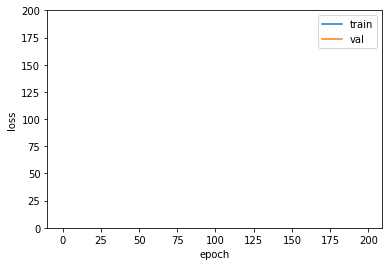

In [23]:
#학습 과정 살펴보기
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.ylim(0.0, 200.0)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'])
plt.show()

In [24]:
#모델 평가
trainScore = model.evaluate(x_train, y_train, verbose=0)
model.reset_states()
print('Train Score: ', trainScore)
valScore = model.evaluate(x_val, y_val, verbose=0)
model.reset_states()
print('Validataion Score: ', valScore)
testScore = model.evaluate(x_test, y_test, verbose=0)
model.reset_states()
print('Test Score: ', testScore)

Train Score:  9939.567277644232
Validataion Score:  9939.567277644232
Test Score:  9213.996064157196


In [29]:
chaba_xdata = []
chaba_realdata = []
for name in typ_name:
    sql = " SELECT * from CHABA"
    cursor.execute(sql)
    result = cursor.fetchall()
    for row_data in result:
        chaba_realdata.append([row_data[1], row_data[2]])
        chaba_xdata.append([row_data[3], row_data[4], row_data[5]])

InterfaceError: (0, '')

In [27]:
#데이터 전처리
chaba_xdata = np.asarray(chaba_xdata, dtype = np.float32)
scaler = MinMaxScaler(feature_range=(0., 1.))
chaba_xdata = scaler.fit_transform(chaba_xdata)
chaba_xdata = np.reshape(chaba_xdata, (-1, 3, 1))

chaba_realdata = np.reshape(chaba_realdata, (-1, 2))

ValueError: Expected 2D array, got 1D array instead:
array=[].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

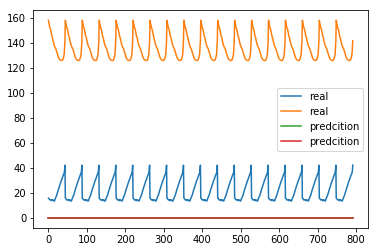

[[0. 0.]
 [0. 0.]
 [0. 0.]
 ...
 [0. 0.]
 [0. 0.]
 [0. 0.]]
[[Decimal('15.8') Decimal('158.1')]
 [Decimal('15.6') Decimal('156.4')]
 [Decimal('15.2') Decimal('154.6')]
 ...
 [Decimal('35.9') Decimal('131.0')]
 [Decimal('37.9') Decimal('136.6')]
 [Decimal('42.2') Decimal('141.8')]]


In [21]:
yhat = model.predict(chaba_xdata, verbose = 0)

plt.plot(chaba_realdata, label = "real")
plt.plot(yhat,label="predcition")
plt.legend()
plt.show()
print(yhat)
print(chaba_realdata)

In [22]:
db.close()